# Supervised and Unsupervised Machine learning Algorithms
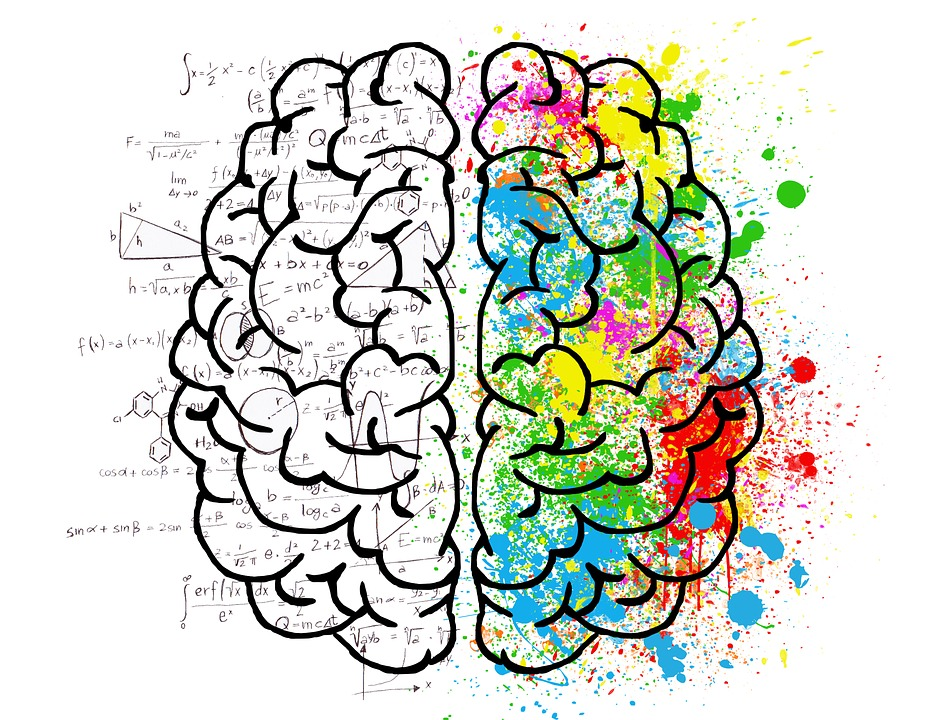

# Fitting Regression Models

In [1]:
# Diabetes Data sets
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Facebook metrics Data Set

Analysis of UCI Facebook Metrics Dataset using statistical methods.

The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.
This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues.

### Attribute Information:

It includes 7 features known prior to post publication and 12 features for evaluating post impact (see Tables 2 and 3 from Moro et al., 2016 - complete reference in the 'Citation Request')

### Justification

A system able to predict the impact of individual published posts can provide a valuable advantage when deciding to communicate through social media, tailoring the promotion of products and services. . Advertising managers could make judged decisions on the receptiveness of the posts published, thus aligning strategies toward optimizing the impact of posts, benefiting from the predictions made.

In [2]:
# Reading the Facebook Metrics Data
#facebook_data = pd.read_csv('https://raw.githubusercontent.com/JazzKriss21/Facebook-Metrics-Data-Analysis/main/dataset_Facebook.csv', 
 #                           sep=';')

facebook_data = pd.read_csv('C:/Users/Ntando/Downloads/dataset_Facebook.csv', sep=";")

In [3]:
facebook_data.head(4)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777


## Nature of Dataset

The data set compiled contained four types of features:

1. Identification—features that allow identifying each individual post
2. Content—the textual content of the post
3. Categorization—features that characterize the post
4. Performance—metrics for measuring the impact of the post (or the impact of the page, in the case of “Page total likes”)

# Exploratory Data Analysis

Text(0.5, 0, 'Type')

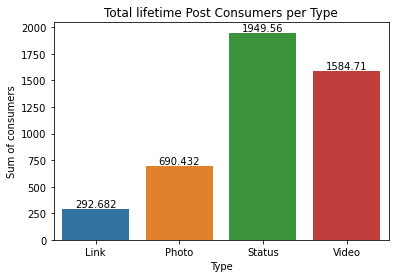

In [4]:
df = facebook_data.groupby(['Type']).agg(Sum = ('Lifetime Post Consumers', 'mean'))
df = df.reset_index()
ax = sn.barplot(x="Type",
           y= "Sum",
           data= df)
ax.bar_label(ax.containers[0])
ax.set_title('Total lifetime Post Consumers per Type')
ax.set_ylabel('Sum of consumers')
ax.set_xlabel('Type')

Text(0.5, 0, 'Post Month')

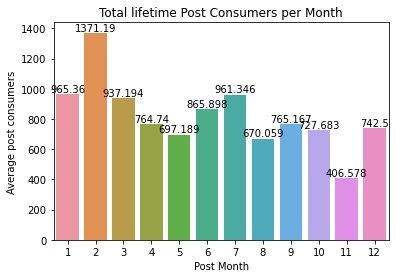

In [5]:
# Post Month
df = facebook_data.groupby(['Post Month']).agg(Sum = ('Lifetime Post Consumers', 'mean'))
df = df.reset_index()
ax = sn.barplot(x="Post Month",
           y= "Sum",
           data= df)
ax.bar_label(ax.containers[0])
ax.set_title('Total lifetime Post Consumers per Month')
ax.set_ylabel('Average post consumers')
ax.set_xlabel('Post Month')

Text(0.5, 0, 'Post Weekday')

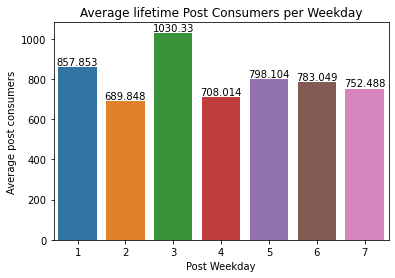

In [6]:
# Post Weekday
df = facebook_data.groupby(['Post Weekday']).agg(Sum = ('Lifetime Post Consumers', 'mean'))
df = df.reset_index()
ax = sn.barplot(x="Post Weekday",
           y= "Sum",
           data= df)
ax.bar_label(ax.containers[0])
ax.set_title('Average lifetime Post Consumers per Weekday')
ax.set_ylabel('Average post consumers')
ax.set_xlabel('Post Weekday')

Text(0.5, 0, 'Post Hour')

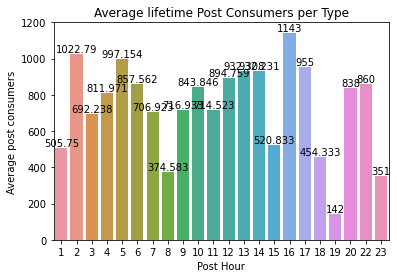

In [7]:
# Post Hour
df = facebook_data.groupby(['Post Hour']).agg(Sum = ('Lifetime Post Consumers', 'mean'))
df = df.reset_index()
ax = sn.barplot(x="Post Hour",
           y= "Sum",
           data= df)
ax.bar_label(ax.containers[0])
ax.set_title('Average lifetime Post Consumers per Type')
ax.set_ylabel('Average post consumers')
ax.set_xlabel('Post Hour')

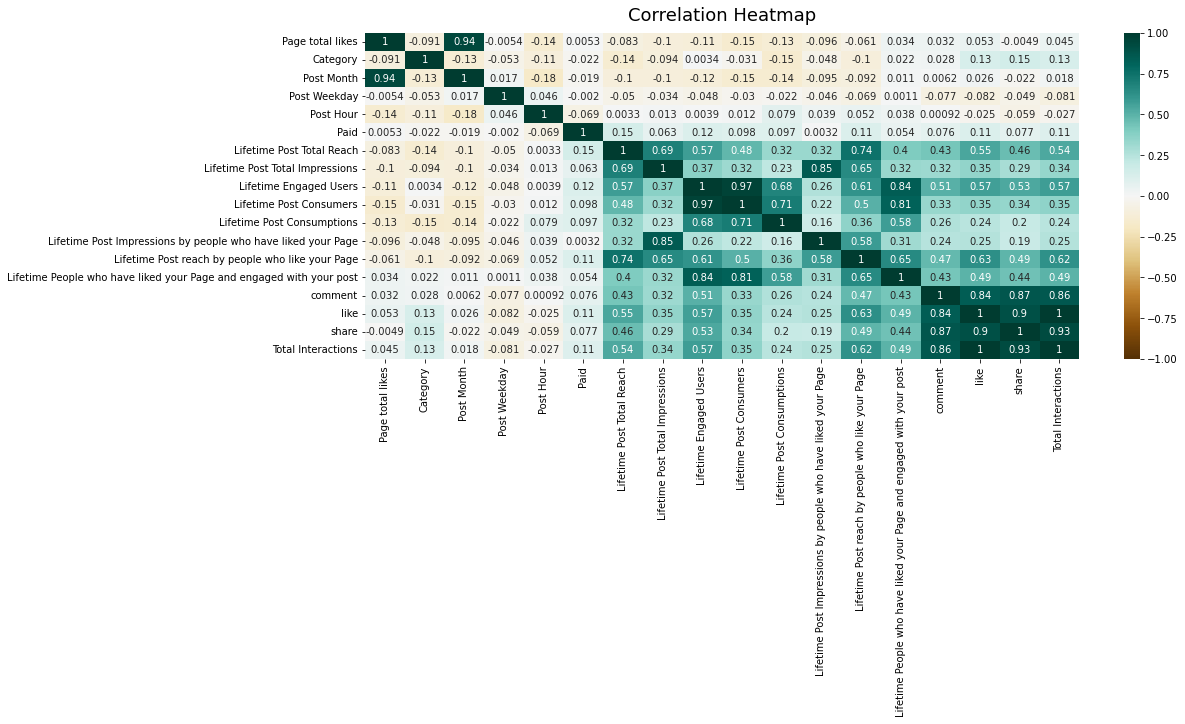

In [8]:
# Heat Map
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(facebook_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [9]:
# Splitting the data
X= facebook_data[['Page total likes', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid']]
y= facebook_data['Lifetime Post Total Reach']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=263)

In [10]:
facebook_data.isnull().sum(axis = 0)

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

lin_model = LinearRegression()
ridge_model = Ridge()
lasso_model= Lasso()



steps = [('imputation', imputer),
         ('Linear Regression', lin_model)]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
#y_pred= pipeline.predict(y_test)
pipeline.score(X_test, y_test)


y_pred_lin = pipeline.predict(X_test)
#mean_squared_error(y_test, y_pred),
mape_lin = mean_absolute_percentage_error(y_test, y_pred_lin)
print('Mean Absolute Percantage Error for the Linear Regression Model is {}'.format(mape_lin))


# Ridge Regression
steps_r = [('imputation', imputer),
         ('Ridge Regression', ridge_model)]

pipeline_r = Pipeline(steps_r)
pipeline_r = pipeline_r.fit(X_train, y_train)
#y_pred= pipeline.predict(y_test)
#pipeline_r.score(X_test, y_test)


y_pred_ridge = pipeline_r.predict(X_test)
mape_ridge =  mean_absolute_percentage_error(y_test, y_pred_ridge)
print('Mean Absolute Percantage Error for the Linear Regression Model is {}'.format(mape_ridge))


# Lasso Rregression
steps_l = [('imputation', imputer),
         ('Lasso Regression', lasso_model)]

pipeline_l = Pipeline(steps_l)
pipeline_l = pipeline_l.fit(X_train, y_train)
#y_pred= pipeline.predict(y_test)
#pipeline_l.score(X_test, y_test)


y_pred_lasso = pipeline_l.predict(X_test)
mape_lasso =  mean_absolute_percentage_error(y_test, y_pred_lasso)
print('Mean Absolute Percantage Error for the Linear Regression Model is {}'.format(mape_lasso))

Mean Absolute Percantage Error for the Linear Regression Model is 3.49089999139159
Mean Absolute Percantage Error for the Linear Regression Model is 3.4898795854012117
Mean Absolute Percantage Error for the Linear Regression Model is 3.49075443510284


# KMeans Clustering Model

## Absenteeism at work Data Set


Data Set Information:

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


In [12]:
absent_data = pd.read_csv("https://raw.githubusercontent.com/Anubhavkumar45/Absenteeism-at-work/master/Absenteeism_at_work.csv", sep=";")

In [13]:
absent_data.head(4)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4


In [14]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


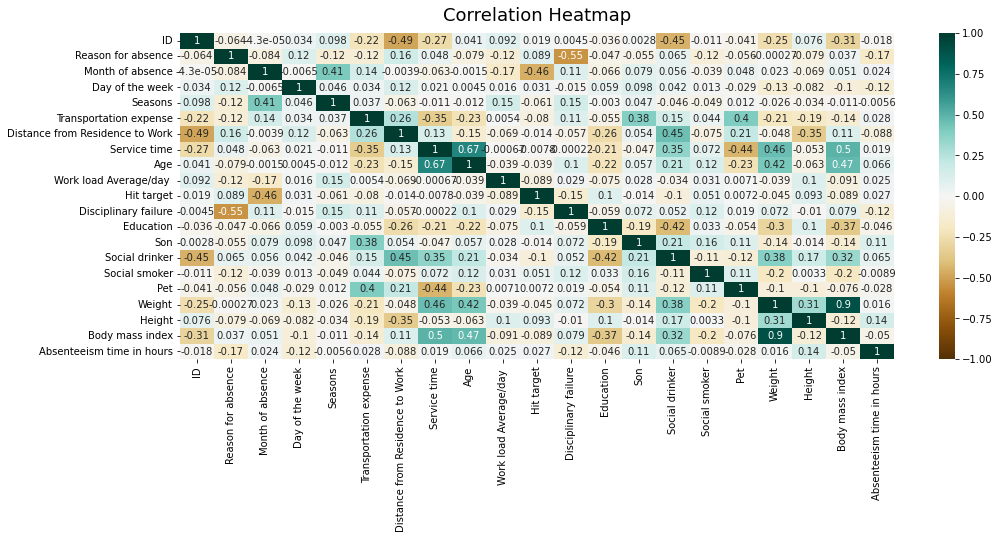

In [15]:
# Heat Map
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(absent_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

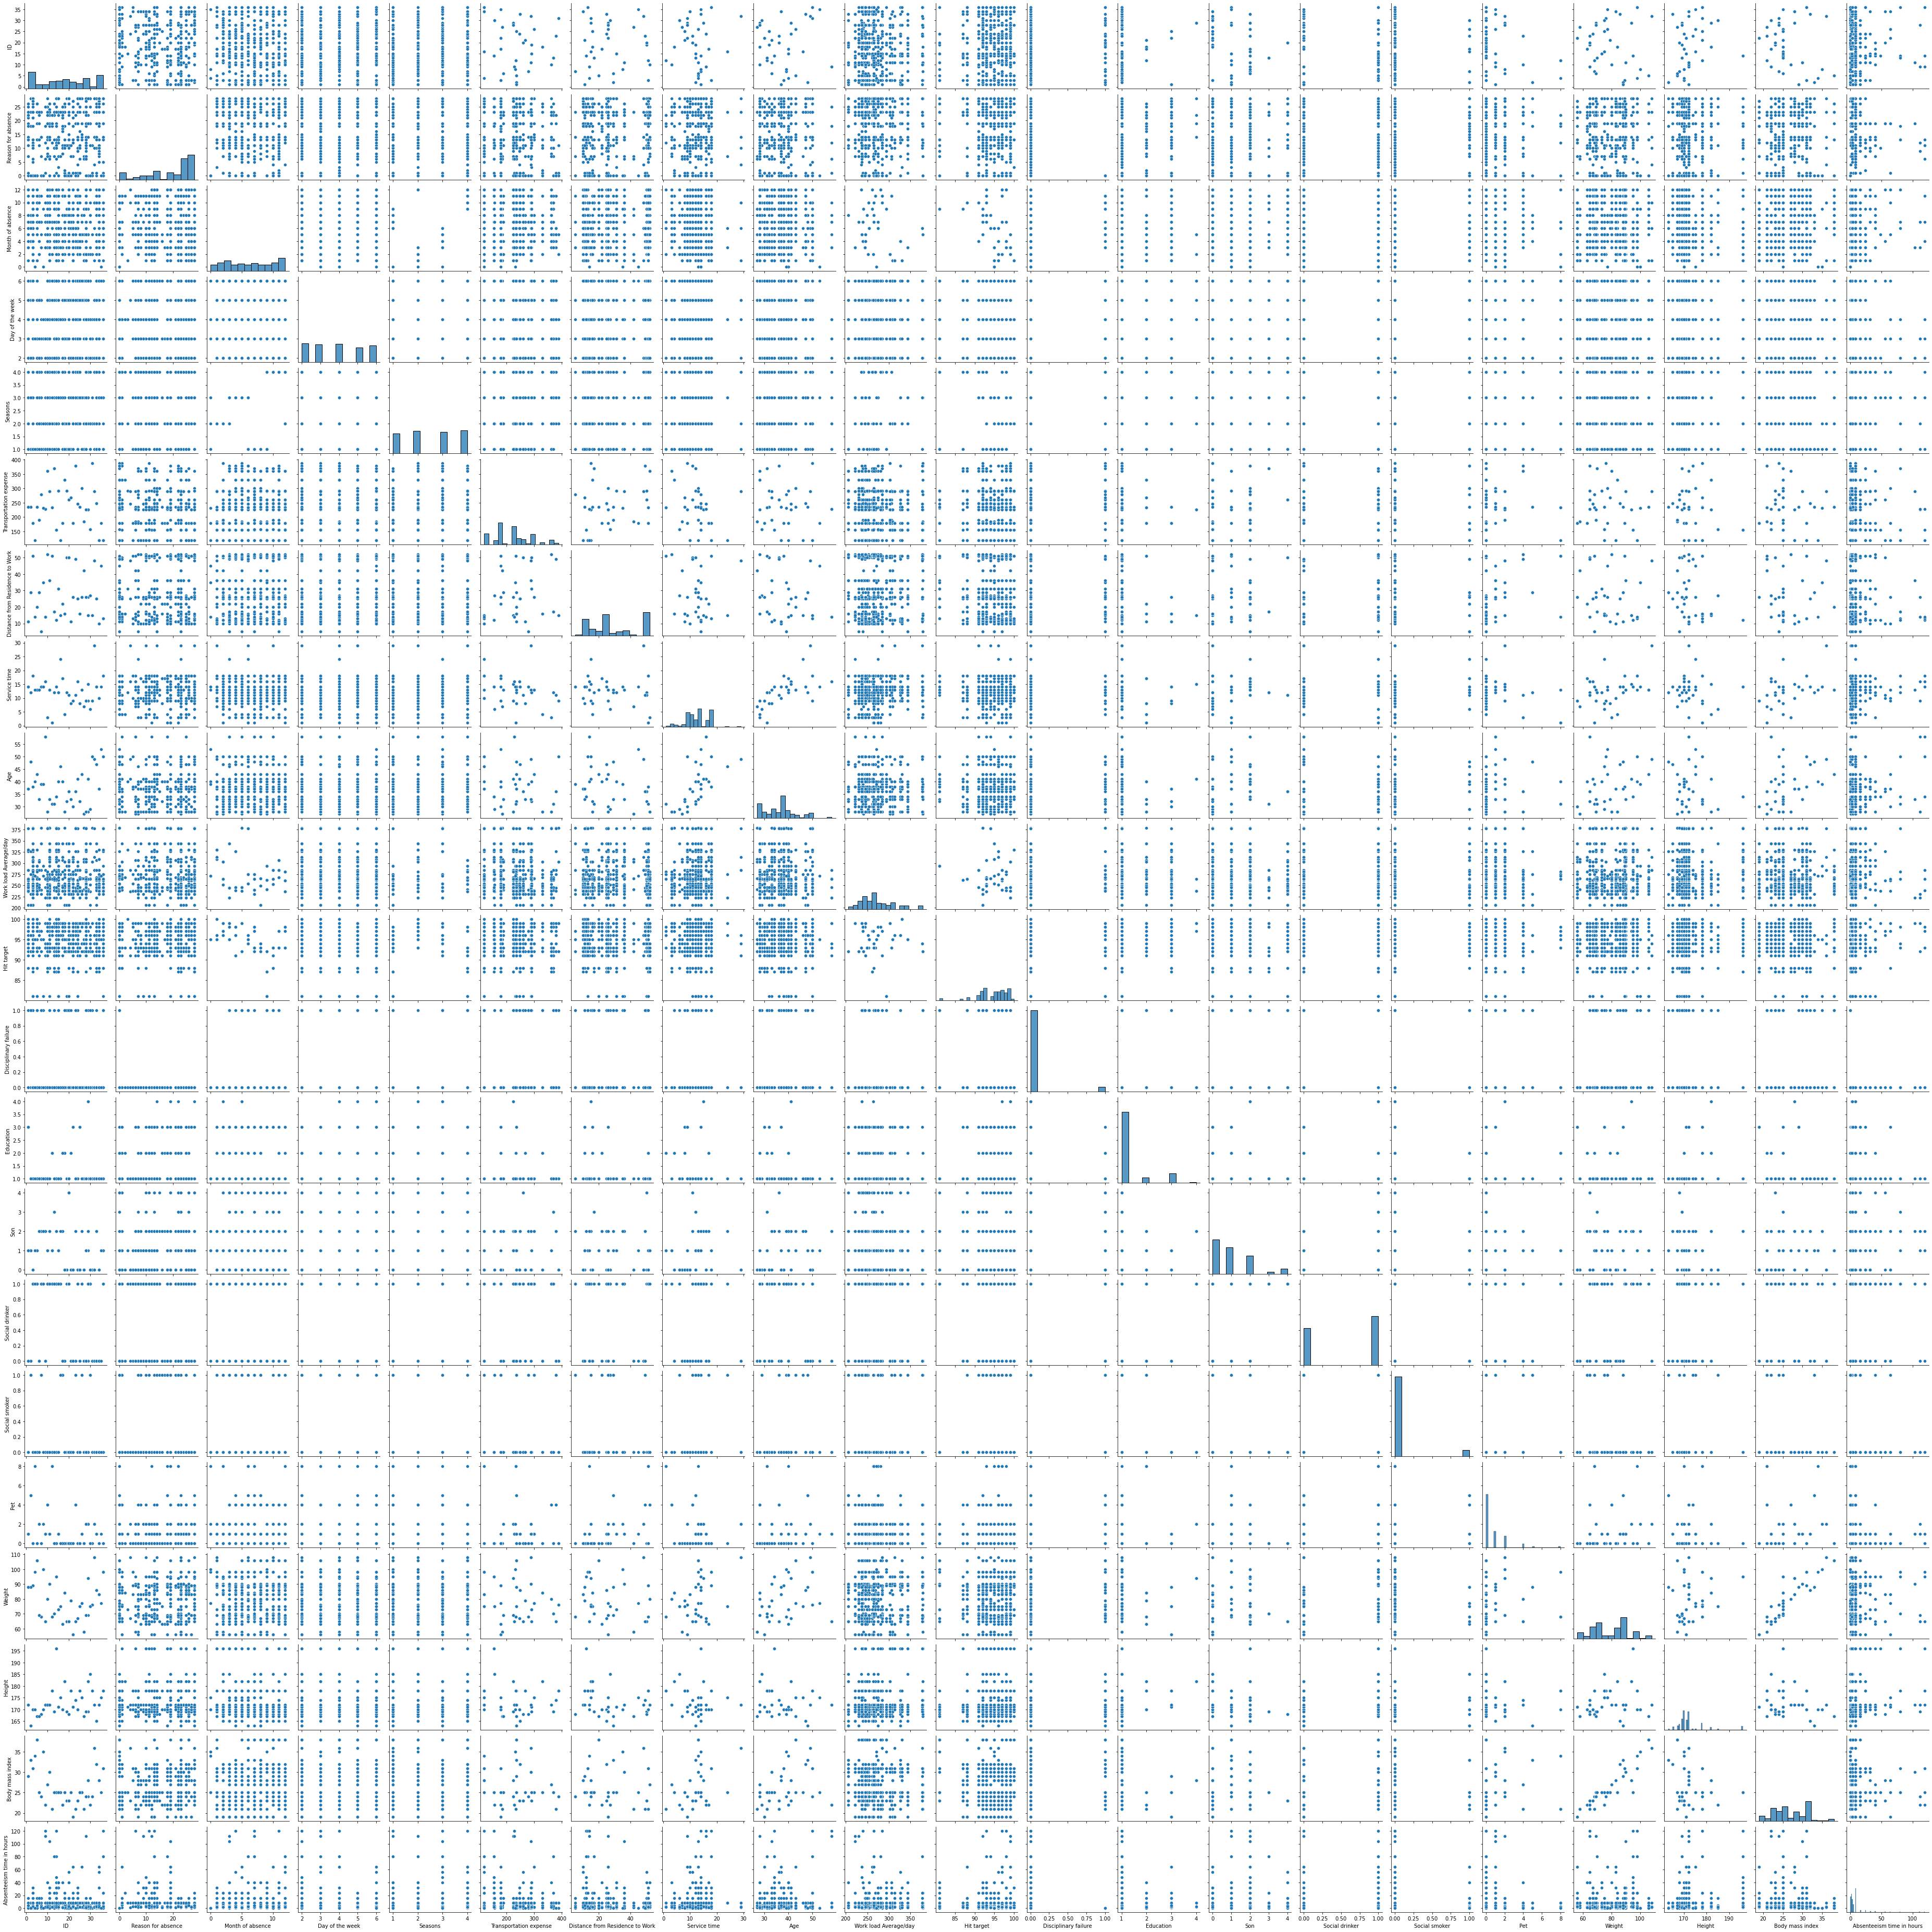

In [16]:
#Pairs Plot
sn.pairplot(absent_data)  # Seems the data is evenly nspread across

In [17]:
# Dropping ID
absent_data = absent_data.drop('ID', axis=1)

C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'WCSS')

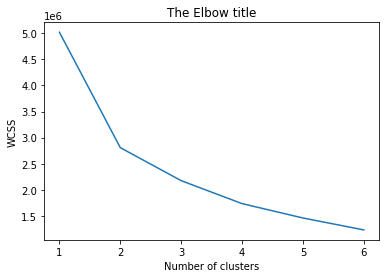

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(absent_data)

wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(absent_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [24]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=200,
    random_state=263)

kmeans.fit(scaled_data)
kmeans.inertia_

11143.25258774021

In [25]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(scaled_data)
print(label)

[2 3 2 1 2 2 1 1 3 0 1 1 1 2 2 2 2 2 1 2 0 2 1 1 2 1 2 0 2 2 2 1 0 1 2 1 2
 1 1 1 0 3 2 2 3 3 2 1 1 1 1 1 1 3 1 3 1 2 1 2 2 1 2 3 3 0 2 1 3 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 0 1 3 1 1 1 3 1 0 1 1 2 1 1 1 2 3 3 0 1 1 3 1 1 1 1 1 3
 1 1 0 3 3 3 0 0 0 0 3 0 3 3 3 3 3 3 0 2 3 0 3 3 0 2 0 2 2 3 0 1 2 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 2 1 0 3 1 3 1 0 1 0 1 2 0 0 0 0 0 2 1 0 2 0 1
 0 3 1 3 0 1 2 3 1 1 1 2 1 1 3 1 1 0 1 1 3 3 2 0 0 3 2 1 1 0 1 1 2 3 1 1 1
 1 1 1 2 3 1 3 0 3 3 1 2 2 0 3 3 3 3 0 0 3 0 0 0 1 2 2 2 2 1 1 0 2 3 1 1 1
 2 2 0 0 3 2 0 3 0 1 0 2 2 1 2 1 1 2 1 2 1 2 1 1 2 3 2 1 1 2 1 0 1 1 3 1 0
 3 1 2 0 2 1 1 2 2 2 3 1 0 3 1 1 1 1 0 0 3 3 2 2 1 1 1 3 2 0 0 3 0 2 1 1 1
 2 1 1 1 1 2 1 2 2 0 3 1 1 2 2 0 3 0 2 2 0 1 0 2 1 0 3 3 0 3 2 1 2 3 2 2 3
 2 0 2 1 2 2 2 2 2 2 0 2 2 1 0 2 2 2 2 2 3 2 2 1 2 0 0 1 2 1 1 0 3 3 3 0 1
 3 2 2 1 2 2 1 0 1 2 0 2 3 3 1 1 2 3 2 2 1 0 2 1 1 0 0 3 0 0 0 3 0 0 3 2 3
 0 1 2 1 2 2 2 2 2 0 3 2 0 2 0 0 0 0 1 0 0 3 1 3 1 1 2 1 2 3 1 2 2 2 1 1 2
 0 2 3 2 2 1 2 0 0 0 2 3 